<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # Allow matplotlib have access to timestamp 
import matplotlib.ticker as mplticker

In [14]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(2000, 1, 1)
end = dt.datetime.today()
CIPI = pdr.data.DataReader('CBI', 'fred', start, end) # change in private inventory
GDP_growth = pdr.data.DataReader('A191RL1Q225SBEA', 'fred', start, end)
TBInv = pdr.data.DataReader('BUSINV', 'fred', start, end)

In [15]:
TBInv = TBInv.pct_change()

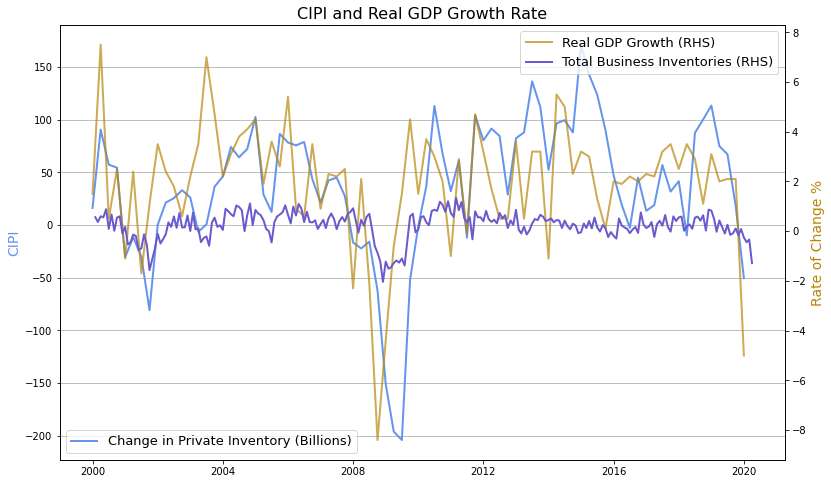

In [23]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(CIPI, color = 'CornflowerBlue', alpha = 1, label = 'Change in Private Inventory (Billions)', lw = 2)
ax.set_ylabel('CIPI', size = 14, color = 'CornflowerBlue')


ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(GDP_growth, color = 'DarkGoldenRod', alpha = .7, label = 'Real GDP Growth (RHS)', lw = 2)
ax_RHS.plot(TBInv*100,color = 'SlateBlue', alpha = 1, label = 'Total Business Inventories (RHS)', lw = 2)
ax_RHS.set_ylabel('Rate of Change %', size = 14, color = 'DarkGoldenRod')

ax.legend(fontsize = 13, loc = 'lower left')
ax_RHS.legend(fontsize = 13, loc = 'upper right')
ax.yaxis.grid(True) # only horizontal grid
ax.set_title('CIPI and Real GDP Growth Rate', size = 16)
plt.show()